# Machine Learning and Statistics Task - 2021


****
The author is Bonny Chimezie Nwosu(G00387847@gmit.ie).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png" alt="" id="yui_3_17_2_1_1639312711423_59">

## An overview to machine learning with scikit-learn
https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

https://towardsdatascience.com/an-overview-of-the-scikit-learn-library-episode-1-preprocessing-9b17ab4dde4f

https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/

*****
Scikit-learn is a very popular Python library for Machine Learning. Initially developed by David Cournapeau in 2007, it began to grow up in 2010, when INRIA, the French Institute for Research in Computer Science and Automation got involved into the project. In September 2021, the latest release of Scikit-learn was released, i.e. 1.0.

Scikit-learn provides all the steps involved in the Machine Learning process, including Data Preprocessing, Feature Extraction, Model Selection, Model Training, Model Evaluation and Model Deployment.

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. 

*****

#### The learning outcome will fall into few categories and I will demonstrate these three interesting scikit-learn algorithms

- Classification

- Regression

- t-Test



In [52]:
#Loading an example dataset

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()


print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
# Learning and predicting

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [4]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [5]:
clf.predict(digits.data[-4:])

array([0, 8, 9, 8])

## Classification  Task


Perform classification analysis in Jupyter on the Wine Quality Data Set available at the UC Irvine Machine Learning Repository.

*****

Classification is when the feature to be predicted contains categories of values. Each of these categories is considered as a class into which the predicted value falls and hence has its name, classification.

Classification is the problem of identifying which of a set of categories (sub-populations) an observation, (or observations) belongs to. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.).

In a machine learning context, classification is a type of supervised learning. Supervised learning means that the data fed to the network is already labeled, with the important features/attributes already separated into distinct categories beforehand.

https://en.wikipedia.org/wiki/Statistical_classification

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

### Classification Analysis on Wine Data set

********

In [6]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [7]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Wine Quality Dataset

*********

In [15]:
# Loading the dataset and printing out a few lines to get a better understanding of the data
red=pd.read_csv("https://raw.githubusercontent.com/G00387847/machineLearningTask/main/data/winequality-red.csv",sep=";")
#white=pd.read_csv("winequality-white.csv",sep=";")

In [16]:

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
#Inspecting the data types and look for instances of missing or possibly errant data.
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# Summary statistics.
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# Group by typically takes a categorical variable.
x = red.groupby('quality')
x

In [20]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [21]:
# create color array for red dataframe
color_red = np.repeat('red', len(red), axis=None)



In [22]:
red['color'] = color_red
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Visualisation

*****

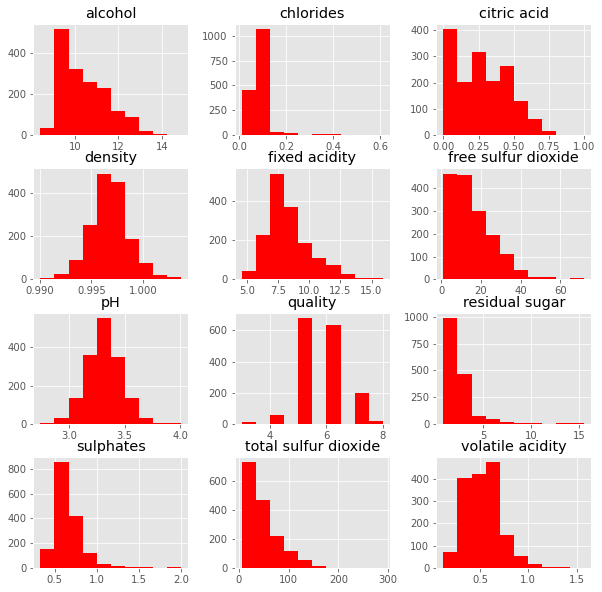

In [23]:
# Hist plots and kdes.
red.hist(color='red',figsize=(10,10));

''

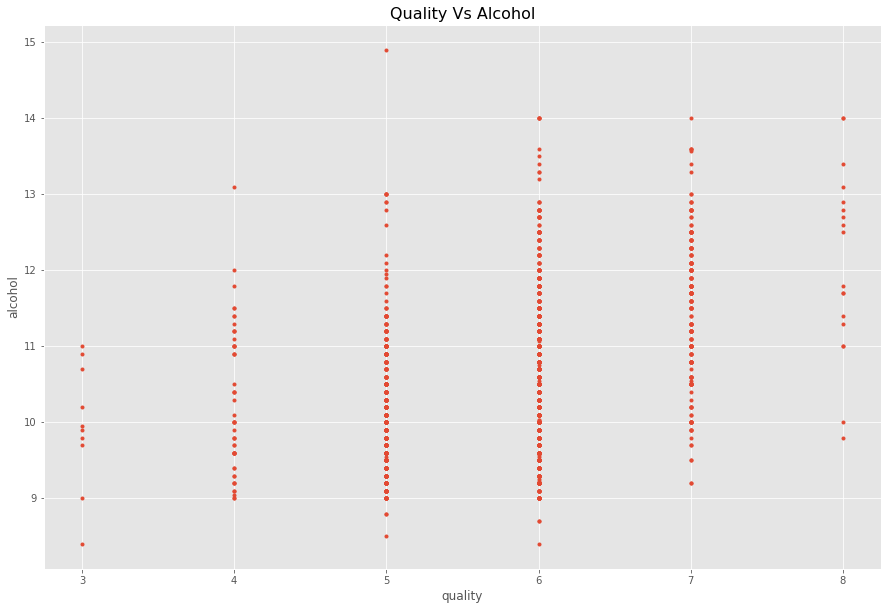

In [24]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(red['quality'], red['alcohol'], '.')

# Set axis labels.
ax.set_title('Quality Vs Alcohol',fontsize=16)
ax.set_xlabel('quality');
ax.set_ylabel('alcohol');
;


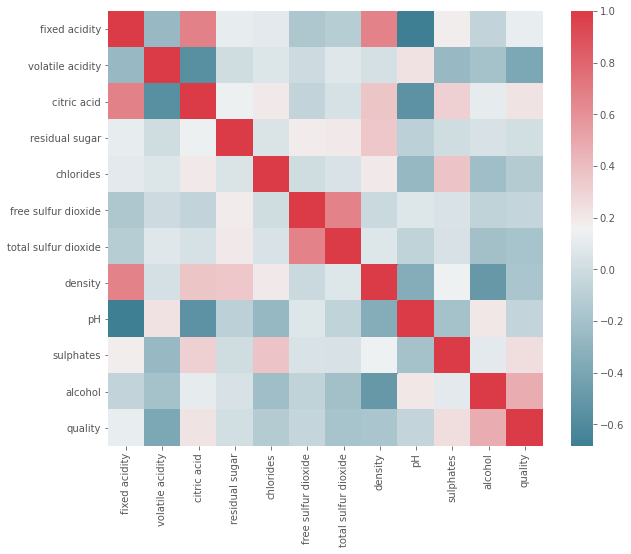

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = red.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

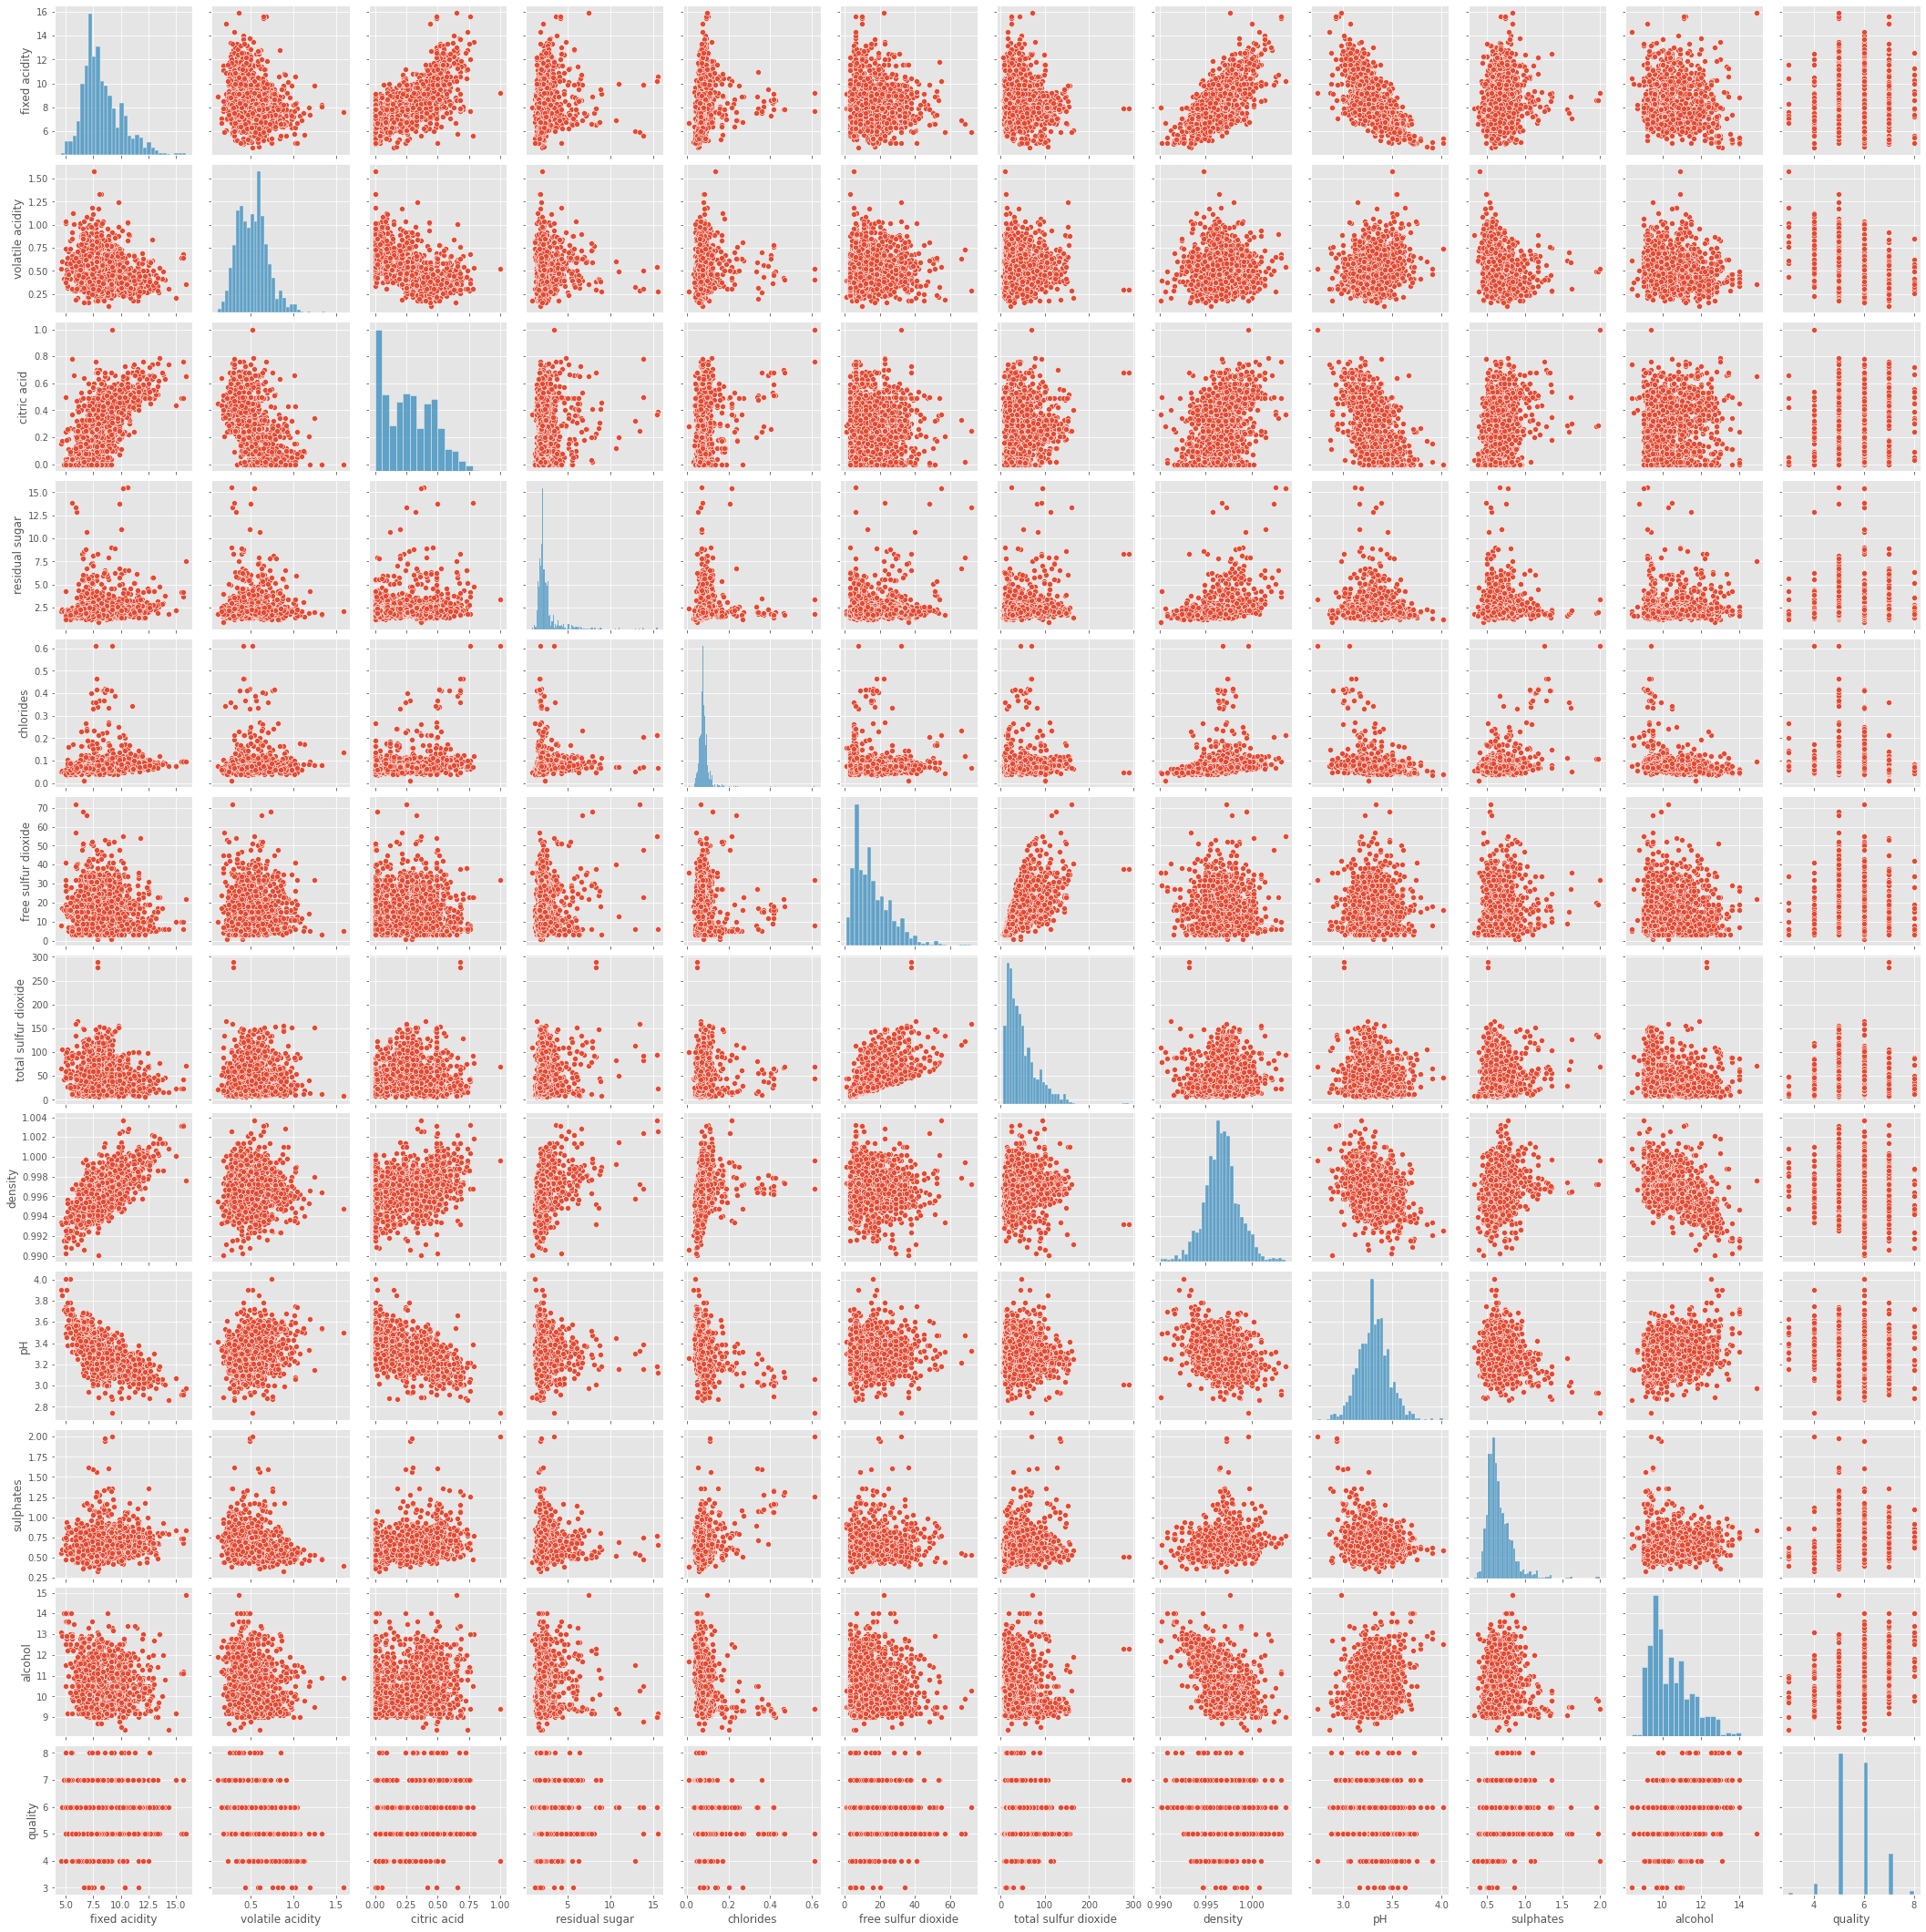

In [26]:
sns.pairplot(red)

In [27]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality color  
459      9.0        3   red  
517      8.4        3   red  
690     10.7        3   red  


i is: '4'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0

## Test and Train Split

****

In [28]:
# Split the data frame in two.
train, test = mod.train_test_split(red)

In [29]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
381,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6,red
492,8.9,0.400,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red
333,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5,red
458,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7,red
1036,7.6,0.310,0.34,2.5,0.082,26.0,35.0,0.99356,3.22,0.59,12.5,7,red


In [30]:
# The indices of the train array.
train.index

Int64Index([ 381,  492,  333,  458, 1036,   67,  474,  417,  483,  680,
            ...
             546,  361, 1532,  582,  877,  647, 1193, 1112, 1510,  921],
           dtype='int64', length=1199)

In [31]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1485,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,5,red
900,8.9,0.310,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8,5,red
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5,red
1496,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,red
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4,red


In [32]:
test.index.size

400


## Two Dimensions: Test Train Split

****

In [33]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']], train['quality']

In [34]:
# Peek at the inputs.
inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
381,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0
492,8.9,0.400,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4
333,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0
458,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2
1036,7.6,0.310,0.34,2.5,0.082,26.0,35.0,0.99356,3.22,0.59,12.5


In [35]:
# Peek at the outputs.
outputs.head()

381     6
492     7
333     5
458     7
1036    7
Name: quality, dtype: int64

## Two Dimensions: Logistic regression

******


https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

https://github.com/Saloni3108/Classification---Wine-Quality-Dataset/blob/main/2.%20Logistic%20Regression.ipynb

In [40]:
# Create a new classifier.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Train the classifier on our data.
lr.fit(inputs, outputs)

C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Ask the classifier to classify the test data
outputs_pred = lr.predict(inputs)
outputs_pred

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [42]:
outputs_train = lr.predict(inputs)

In [43]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(outputs,outputs_pred)

array([[  0,   0,   9,   1,   0,   0],
       [  0,   1,  24,  13,   0,   0],
       [  0,   1, 400, 103,   2,   0],
       [  0,   2, 159, 303,   7,   0],
       [  0,   0,  12, 140,   7,   0],
       [  0,   0,   0,  13,   2,   0]], dtype=int64)

In [44]:
# classification report
rep = classification_report(outputs,outputs_pred)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.25      0.03      0.05        38
           5       0.66      0.79      0.72       506
           6       0.53      0.64      0.58       471
           7       0.39      0.04      0.08       159
           8       0.00      0.00      0.00        15

    accuracy                           0.59      1199
   macro avg       0.30      0.25      0.24      1199
weighted avg       0.55      0.59      0.54      1199



C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
rep = classification_report(outputs,outputs_train)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.25      0.03      0.05        38
           5       0.66      0.79      0.72       506
           6       0.53      0.64      0.58       471
           7       0.39      0.04      0.08       159
           8       0.00      0.00      0.00        15

    accuracy                           0.59      1199
   macro avg       0.30      0.25      0.24      1199
weighted avg       0.55      0.59      0.54      1199



In [46]:
#Boosting - To overcome Overfitting of Training dataset
from sklearn.ensemble import AdaBoostClassifier

In [47]:
adb = AdaBoostClassifier(LogisticRegression(),n_estimators=5,learning_rate=1)
adb.fit(inputs,outputs_train)

C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=5)

In [48]:
adb.score(inputs,outputs)

0.5846538782318599

In [49]:
adb.score(inputs,outputs_train)

0.8732276897414513

# Regression Task

******
The statistical methods which helps us to estimate or predict the unknown value of one variable from the known value of related variable is called regression.

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is one of them.

https://realpython.com/linear-regression-in-python/

https://iq.opengenus.org/linear-regression-using-scikit-learn/

I will be using Multiple linear regression 


https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/regression.ipynb


#### Numerical arrays and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Plots styles and Plot size

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

#### Creating two points

In [3]:
x = np.array([4.0, 16.0])
y = np.array([6.0, 12.0])
x, y

(array([ 4., 16.]), array([ 6., 12.]))

#### Ploting the points and giving  some space

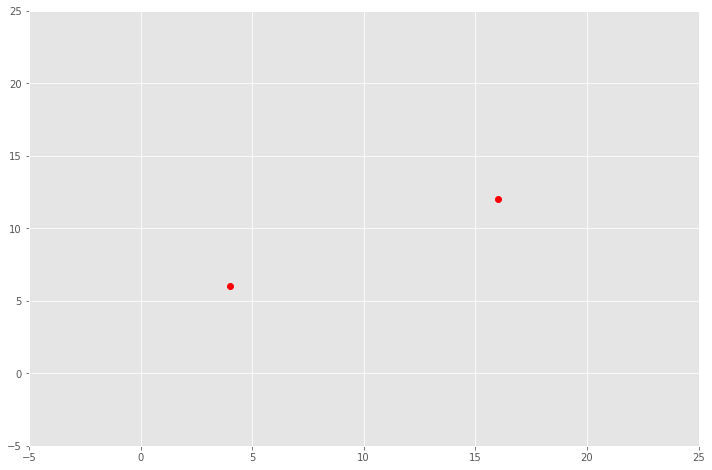

In [4]:
plt.plot(x, y, 'ro')

plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

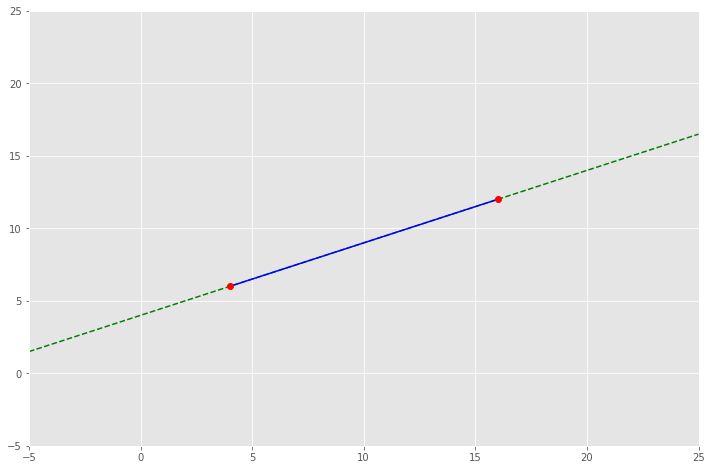

In [5]:
# Plot a straight line.
l = np.linspace(-5.0, 25.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g--')

# Plot a straight line segment.
l = np.linspace(4.0, 16.0, 10)
plt.plot(l, 0.5 * l + 4.0, 'b-')

# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

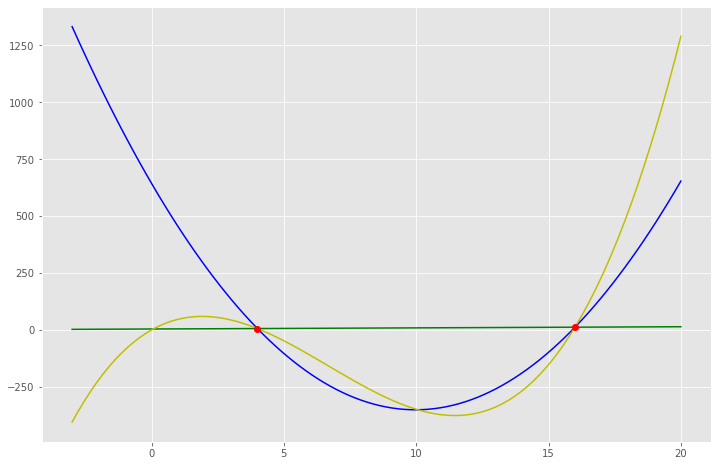

In [6]:
# Plot a straight line.
l = np.linspace(-3.0, 20.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g-')

# Plot a parabola.
plt.plot(l, 10.0 * (l**2) - 199.5 * l + 644.0, 'b-')

# Plot a cubic.
plt.plot(l, (l**3)  - 20.0625 * l**2  + 65.75 * l, 'y-')

# Plot the points.
plt.plot(x, y, 'ro');


#### x values set up

In [7]:
x = np.linspace(0.0, 10.0, 1000)
x

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

In [8]:
# Create y - note numpy's element-wise operations.
y = 5.0 * x + 2.0

y

array([ 2.        ,  2.05005005,  2.1001001 ,  2.15015015,  2.2002002 ,
        2.25025025,  2.3003003 ,  2.35035035,  2.4004004 ,  2.45045045,
        2.5005005 ,  2.55055055,  2.6006006 ,  2.65065065,  2.7007007 ,
        2.75075075,  2.8008008 ,  2.85085085,  2.9009009 ,  2.95095095,
        3.001001  ,  3.05105105,  3.1011011 ,  3.15115115,  3.2012012 ,
        3.25125125,  3.3013013 ,  3.35135135,  3.4014014 ,  3.45145145,
        3.5015015 ,  3.55155155,  3.6016016 ,  3.65165165,  3.7017017 ,
        3.75175175,  3.8018018 ,  3.85185185,  3.9019019 ,  3.95195195,
        4.002002  ,  4.05205205,  4.1021021 ,  4.15215215,  4.2022022 ,
        4.25225225,  4.3023023 ,  4.35235235,  4.4024024 ,  4.45245245,
        4.5025025 ,  4.55255255,  4.6026026 ,  4.65265265,  4.7027027 ,
        4.75275275,  4.8028028 ,  4.85285285,  4.9029029 ,  4.95295295,
        5.003003  ,  5.05305305,  5.1031031 ,  5.15315315,  5.2032032 ,
        5.25325325,  5.3033033 ,  5.35335335,  5.4034034 ,  5.45

#### Plot X and Y gragh

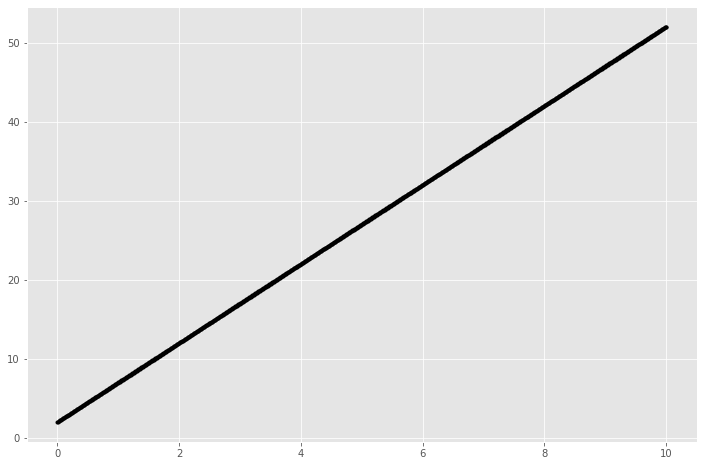

In [9]:
plt.plot(x, y, 'k.')

In [10]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([5., 2.])

In [11]:
# y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

y

array([-3.65901085e+00, -1.89114302e+00, -1.89549447e+00, -2.17327851e+00,
       -2.38257749e+00, -2.69245614e-01, -1.89123877e+00, -1.81530109e+00,
       -2.16604501e+00,  8.50933880e-01, -4.11701828e-01,  4.36018023e-01,
       -1.10272604e+00, -1.17721025e-01, -1.20343793e+00, -3.28516835e-01,
       -1.60735738e+00, -2.22462248e+00,  4.37443270e-01,  1.01971575e+00,
        1.88803201e+00, -3.79521458e-01, -2.44781962e-01, -1.51734317e+00,
       -4.13573831e-01, -2.70549757e-01,  4.28691273e-01,  9.64472303e-02,
       -5.06251289e-01,  9.38137948e-02,  1.13707688e+00, -7.32817877e-01,
       -5.42433439e-01,  7.16117072e-01, -1.32740461e+00,  1.35292606e+00,
        3.06489720e-02,  7.62293663e-01,  1.01134221e+00, -6.89951732e-01,
       -1.48044609e+00,  2.92579918e+00, -8.58829666e-01,  9.71656203e-01,
        1.05889984e+00, -6.92934526e-01,  1.17572682e+00, -8.07675301e-01,
       -1.66513237e-01,  7.24115590e-01, -3.40540870e-01,  4.17517617e-01,
        1.92836077e+00,  

#### X and Y arrays regression using numpy 

In [12]:
np.polyfit(x, y, 1)

array([ 2.99477766, -1.00264685])

In [13]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(2.994777663907298, -1.0026468514210243)

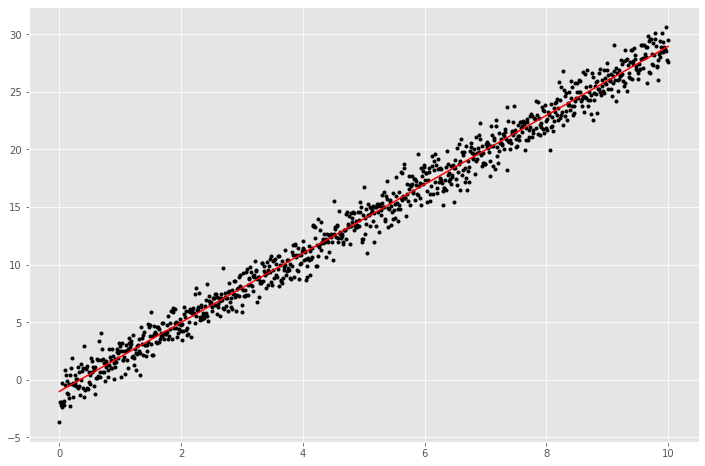

In [14]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

 #### calculating  the best m and c ourselves

In [15]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(2.9947776639072963, -1.0026468514210194)

In [16]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

y

array([ 1.70992831e+00,  6.00619213e-01,  6.95734485e-01,  2.20354578e+00,
        2.95681612e+00,  1.19136062e+00,  2.01952984e+00,  1.98433355e-01,
        3.19362500e-01,  1.49862814e+00,  1.83510682e+00,  1.01547848e+00,
        4.94924539e-01,  6.83901801e-01,  2.04461785e+00,  2.90824426e+00,
        1.10608852e+00,  1.69145184e+00,  3.45274202e+00,  2.24551314e+00,
        2.82395290e-01,  3.60624588e+00,  1.11159015e+00,  3.25775255e+00,
        2.64468662e+00,  2.67255205e+00,  3.12572754e+00,  2.81440474e+00,
       -5.89727681e-01,  1.05216361e+00,  2.79486603e+00,  2.32740444e+00,
        2.10933750e+00,  2.18699687e+00,  2.55010728e+00,  3.35743075e+00,
        2.24500287e+00,  8.67728290e-01,  2.56414525e+00,  3.72394019e+00,
        3.23454752e+00,  3.25816276e+00,  2.73236735e+00,  2.91481961e+00,
        3.10217554e+00,  5.20774104e+00,  4.34636859e+00,  3.30497730e+00,
        4.34586408e+00,  4.27957613e+00,  4.20700541e+00,  2.93350001e+00,
        3.99182801e+00,  

In [17]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(25.000375242617277, -32.27261654321655)

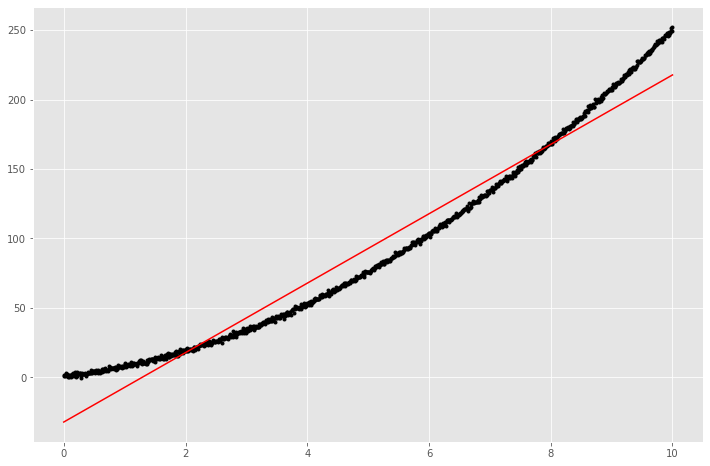

In [18]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

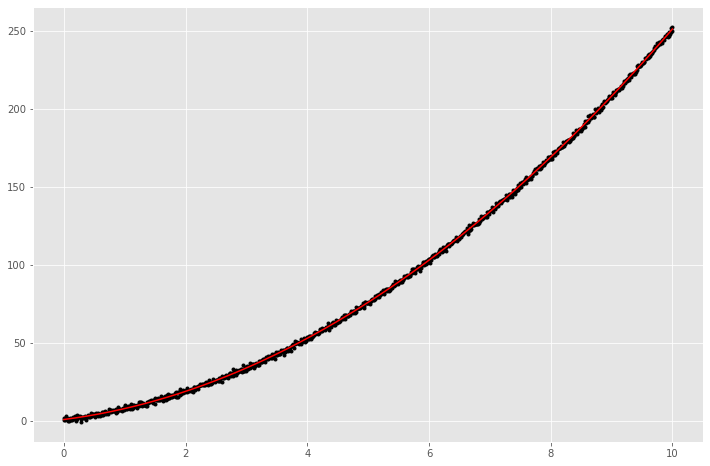

In [19]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')

### Multiple linear regression using Sklearn
****

When we are discussing multiple linear regression then the equation of simple linear regression y=A+Bx is converted to something like:

                            equation:  y = A+B1x1+B2x2+B3x3+B4x4

“If we have one dependent feature and multiple independent features then basically call it a multiple linear regression.”

https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

In [1]:
# Import linear_model from sklearn.
import numpy as np
import sklearn.linear_model as lm

In [2]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [3]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/G00387847/machineLearningTask/main/forestfires.csv')

In [5]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Linear regression  prediction on the variebles

In [7]:
x = df[['X']]

In [8]:
y = df['Y']

### model to fit the data

In [9]:
m.fit(x, y)

LinearRegression()

In [10]:
# intercept.
m.intercept_

2.960668878336235

In [11]:
# coefficients, in order.
m.coef_

array([0.28679958])

In [12]:
# fitting x, y.
m.score(x, y)

0.29111222897840083

In [14]:
# Calculating the score 
t  = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['X']  + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.29111222897840083

### Using statsmodels

In [15]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     211.5
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.17e-40
Time:                        12:05:04   Log-Likelihood:                -751.14
No. Observations:                 517   AIC:                             1506.
Df Residuals:                     515   BIC:                             1515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9607      0.103     28.814      0.0

# t-Tests Task
******

t -tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing t-tests in Python.

For information about the t-test itself, I recommend reading Laerd Statistics's Independent t-test using SPSS Statistics.

https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/ttest.ipynb

In [2]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

### Fake data value

******

We can create fake data sets with specific properties to investigate numerical methods

In [3]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.917125
1,A,1.390452
2,A,0.890288
3,A,1.471940
4,A,0.929158
...,...,...
75,B,1.855692
76,B,1.722861
77,B,1.696221
78,B,2.138076


### Plotting the data
****
A good plot can quickly show us what the numbers look like

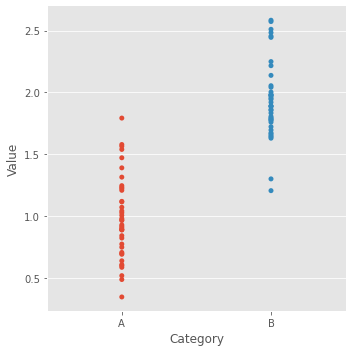

In [4]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);



### t-Test
****
Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others

In [5]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -13.203301506529877	p-value: 1.4044175811034499e-21
P_scipy: 0.00


In [6]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -13.203301506529879	p-value: 1.4044175811034302e-21	Deg Free: 78.0
P_statsmodels: 0.00


### Visualisation
****

t -tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

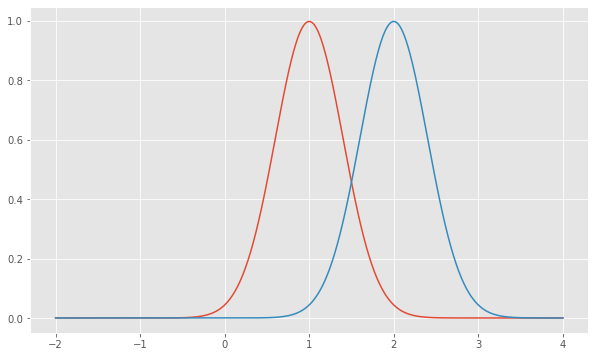

In [7]:
# Let's create a plot with the following x values.
x = np.linspace(-2.0, 4.0, 1000)

# We'll have plots of two different populations on one set of axes.
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()


### critical values
*****

The critical value is used to make a decision regarding the calculation of the t statistic from the samples.

If the probability of seeing such a t value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

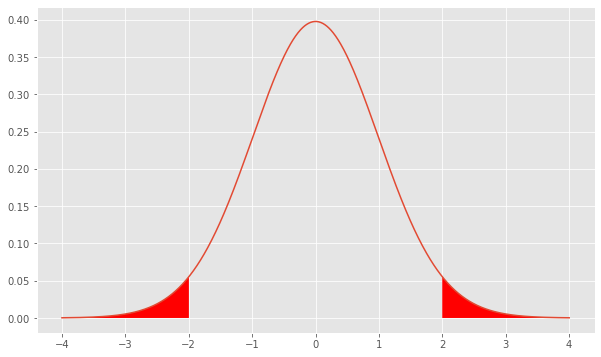

In [8]:
# This code just builds the plot below.

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d_sm)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d_sm))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

### Type |- errors False Positive

******

In [9]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.69%


### Type ||  error - False Negative
*****

The chance of a false negative is harder to quantify - it depends on how close the means are

In [10]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

35.22%


In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/G00387847/machineLearningTask/main/sleep.csv")
df

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [17]:
colum1 = df[df["group"] == 1]
colum1 = colum1.sort_values("ID")
colum1 = colum1["extra"].to_numpy()

In [18]:
colum1

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [19]:
colum2 = df[df["group"] == 2]
colum2 = colum2.sort_values("ID")
colum2 = colum2["extra"].to_numpy()

In [20]:
colum2

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [21]:
ss.ttest_rel(colum1, colum2)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [22]:
ss.ttest_1samp(colum2 - colum1, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [23]:
stat.DescrStatsW(colum2 - colum1).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)


### Samples and populations

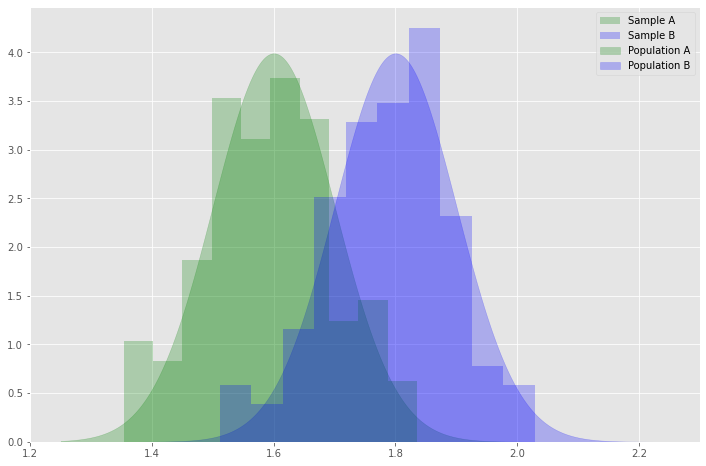

In [24]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(x, popA['m'], popA['s'])
pdfB = ss.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

#### multiple t-Tests problems
*****

Comparing the three sample to see if it can run parellel

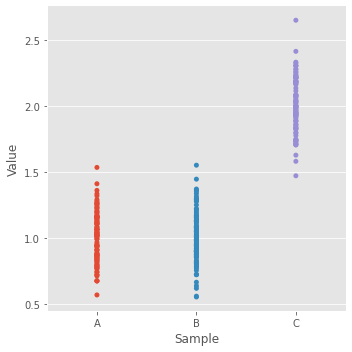

In [25]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [26]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.91	p_AC: 0.00	p_BC: 0.00


In [27]:
# run 1000 tests, Type I Errors

falsepos = 0

for i in range(1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(B, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print(f"False positive rate: {falsepos / 10}%")

False positive rate: 11.2%


In [28]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"{P:.2f}")

0.00
